# Tutorials for using the codegreen_core package. 

<hr>

This tutorial has many independent parts demonstrating various ways to use the package, including getting energy data, analyzing it, and using the available tools.

## Prerequisite 
Before beginning the tutorial, make sure you have successfully installed and configured the package.
The details to set up can be found here

## Gathering energy data

Lets start by finding out  how much energy was produced in Germany in January 2025

In [1]:
from codegreen_core.data import energy
from datetime import datetime
import matplotlib.pyplot as plt

In [18]:
de1 = energy("DE",datetime(2025,1,1),datetime(2025,1,31),"generation")

The 2 main components of  `de_jan25` are `data` (a dataframe) and `columns` (the list of columns categories)

In [19]:
de1["columns"]

{'renewable': ['Wind Onshore',
  'Hydro Water Reservoir',
  'Biomass',
  'Other renewable',
  'Waste',
  'Geothermal',
  'Solar',
  'Hydro Pumped Storage',
  'Hydro Run-of-river and poundage',
  'Wind Offshore'],
 'nonRenewable': ['Fossil Gas',
  'Fossil Oil',
  'Fossil Coal-derived gas',
  'Other',
  'Fossil Brown coal/Lignite',
  'Fossil Hard coal'],
 'percentage': ['Wind_per',
  'Solar_per',
  'Nuclear_per',
  'Hydroelectricity_per',
  'Geothermal_per',
  'Natural Gas_per',
  'Petroleum_per',
  'Coal_per',
  'Biomass_per']}

In [20]:
de1["data"]

,startTime,startTimeUTC,Biomass,Fossil Brown coal/Lignite,Fossil Coal-derived gas,Fossil Gas,Fossil Hard coal,Fossil Oil,Geothermal,Hydro Pumped Storage,...,percentRenewableWS,Wind_per,Solar_per,Nuclear_per,Hydroelectricity_per,Geothermal_per,Natural Gas_per,Petroleum_per,Coal_per,Biomass_per
group_id,,,,,,,,,,,,,,,,,,,,,
0,2025-01-01 00:00:00+01:00,202412312300,4046.00,3269.50,595.75,4692.50,2806.50,382.0,27.0,458.00,...,66,66,0,0,3,0,9,0,11,7
1,2025-01-01 01:00:00+01:00,202501010000,3989.25,3739.25,570.00,4327.50,2719.00,382.0,27.0,144.25,...,67,67,0,0,2,0,8,0,11,7
2,2025-01-01 02:00:00+01:00,202501010100,3982.25,3265.00,538.00,4217.75,2717.00,382.0,27.0,1.00,...,68,68,0,0,2,0,8,0,10,7
3,2025-01-01 03:00:00+01:00,202501010200,3955.00,3226.50,494.50,4279.50,2639.00,382.0,27.0,97.00,...,67,67,0,0,2,0,9,0,11,7
4,2025-01-01 04:00:00+01:00,202501010300,3915.25,3237.50,474.00,4335.00,2583.25,382.0,27.0,3.25,...,67,67,0,0,2,0,9,0,11,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2025-01-30 19:00:00+01:00,202501301800,4479.25,10649.75,369.50,14320.50,6380.00,366.0,27.0,2851.00,...,26,26,0,0,7,0,25,0,30,7
716,2025-01-30 20:00:00+01:00,202501301900,4459.75,10623.00,332.75,13967.50,6354.00,366.0,27.0,1289.00,...,30,29,0,0,4,0,25,0,30,7
717,2025-01-30 21:00:00+01:00,202501302000,4413.00,10607.25,350.75,12322.25,6247.00,366.0,27.0,337.75,...,32,32,0,0,3,0,23,0,30,8


Let's find out answers to some questions like :
- what is the total amount of energy produced in the month of January 25 in Germany ?
- What percantage of energy was produced from renewable sources

We draw some plots to answer these questions.

**Total energy produced from renewable and non renewable sources**

In [21]:
total_renewable = de1["data"][de1["columns"]["renewable"]].sum().sum()
total_non_renewable = de1["data"][de1["columns"]["nonRenewable"]].sum().sum()
print(total_renewable)
print(total_non_renewable)

22218361.25
18472372.25


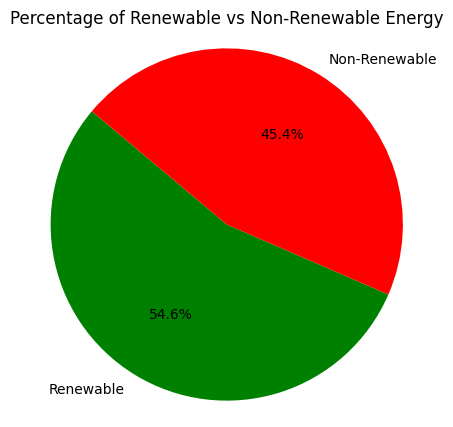

In [22]:
plt.figure(figsize=(5, 5))
plt.pie([total_renewable, total_non_renewable], labels=["Renewable", "Non-Renewable"], autopct='%1.1f%%', colors=["green", "red"], startangle=140)
plt.title("Percentage of Renewable vs Non-Renewable Energy")
plt.axis("equal")
plt.show()

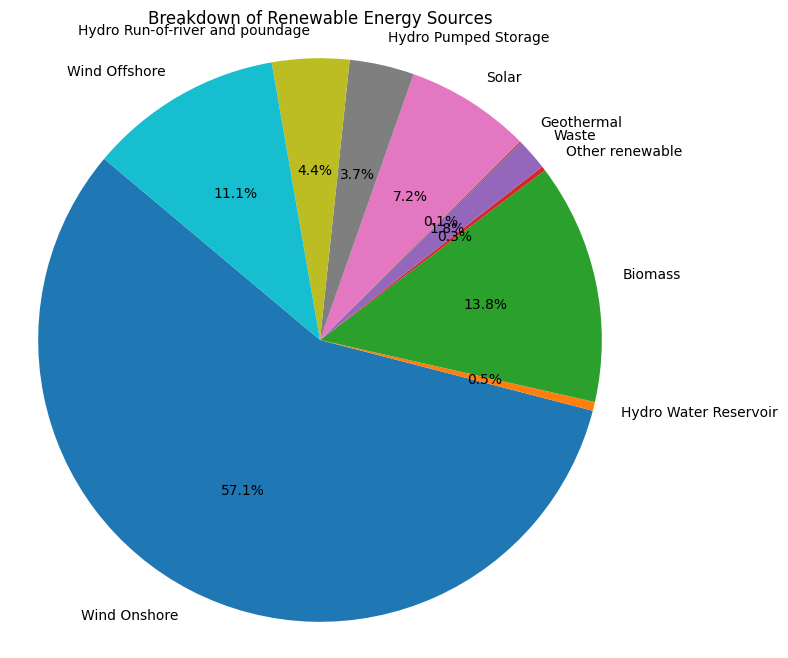

In [23]:
plt.figure(figsize=(8,8))
plt.pie(de1["data"][de1["columns"]["renewable"]].sum(), labels=de1["columns"]["renewable"], autopct='%1.1f%%', startangle=140)
plt.title("Breakdown of Renewable Energy Sources")
plt.axis("equal")
plt.show()

We can also observe the trend of energy generation (renewable vs non renewable) as a time series 

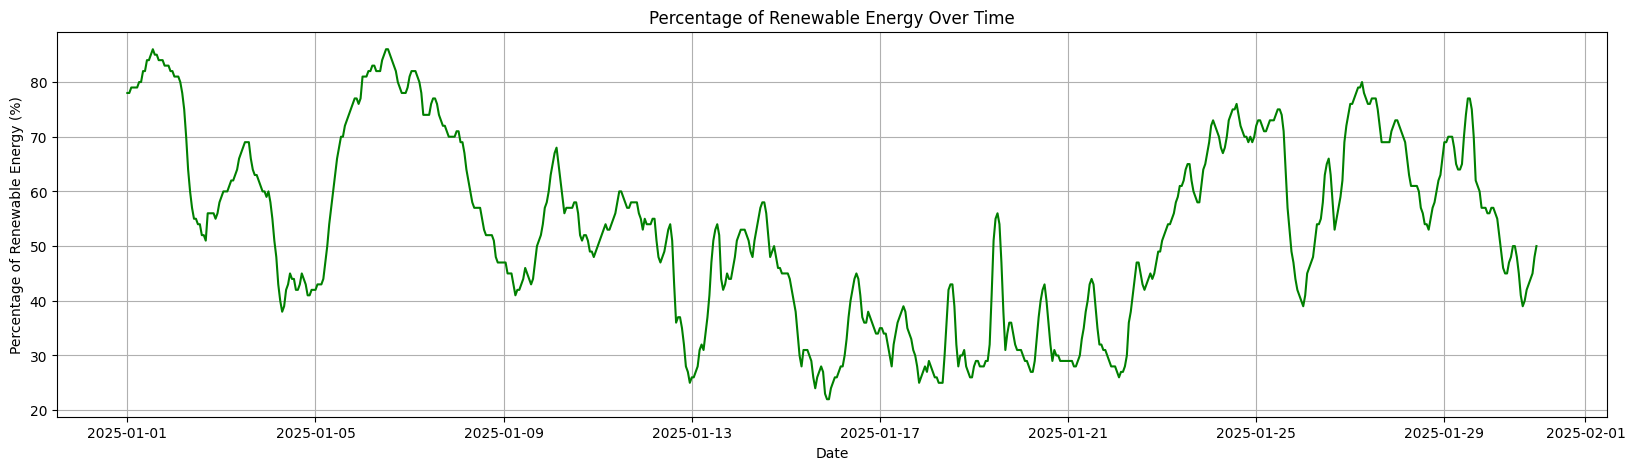

In [31]:
# Line chart for percentageRen
plt.figure(figsize=(20, 5))
plt.plot(de1["data"]["startTime"], de1["data"]["percentRenewable"], linestyle="-", color="green")
plt.xlabel("Date")
plt.ylabel("Percentage of Renewable Energy (%)")
plt.title("Percentage of Renewable Energy Over Time")
plt.grid(True)
plt.show()

## Finding the carbon intensity of energy

Now that we have the time series of energy production data, we can also calculate the carbon intensity for it using one of our tools.


What is carbon intensity? 
Basic definiton (for more see documentation)



In [32]:
from codegreen_core.tools.carbon_intensity import compute_ci_from_energy

In [33]:
ci1 =  compute_ci_from_energy(de1["data"])

In [34]:
ci1

,ci_codecarbon,ci_ipcc_lifecycle_min,ci_ipcc_lifecycle_mean,ci_ipcc_lifecycle_max,ci_eu_comm,startTime,startTimeUTC,Biomass,Fossil Brown coal/Lignite,Fossil Coal-derived gas,...,Wind_per,Solar_per,Nuclear_per,Hydroelectricity_per,Geothermal_per,Natural Gas_per,Petroleum_per,Coal_per,Biomass_per,ci_default
0,194.26,149.53,176.56,300.48,157.33,2025-01-01 00:00:00+01:00,202412312300,4046.00,3269.50,595.75,...,66,0,0,3,0,9,0,11,7,176.56
1,186.83,145.50,171.53,272.44,153.00,2025-01-01 01:00:00+01:00,202501010000,3989.25,3739.25,570.00,...,67,0,0,2,0,8,0,11,7,171.53
2,177.14,138.17,163.45,263.79,143.41,2025-01-01 02:00:00+01:00,202501010100,3982.25,3265.00,538.00,...,68,0,0,2,0,8,0,10,7,163.45
3,194.26,149.59,176.44,278.94,157.25,2025-01-01 03:00:00+01:00,202501010200,3955.00,3226.50,494.50,...,67,0,0,2,0,9,0,11,7,176.44
4,194.26,149.59,176.44,278.94,157.25,2025-01-01 04:00:00+01:00,202501010300,3915.25,3237.50,474.00,...,67,0,0,2,0,9,0,11,7,176.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,492.83,352.77,407.12,647.18,405.99,2025-01-30 19:00:00+01:00,202501301800,4479.25,10649.75,369.50,...,26,0,0,7,0,25,0,30,7,407.12
716,492.83,352.96,406.75,582.54,405.75,2025-01-30 20:00:00+01:00,202501301900,4459.75,10623.00,332.75,...,29,0,0,4,0,25,0,30,7,406.75
717,478.49,348.73,401.90,555.46,398.04,2025-01-30 21:00:00+01:00,202501302000,4413.00,10607.25,350.75,...,32,0,0,3,0,23,0,30,8,401.90
718,456.98,336.72,387.42,515.78,385.54,2025-01-30 22:00:00+01:00,202501302100,4420.50,10414.25,347.25,...,36,0,0,2,0,20,0,30,8,387.42


You will find in the data carbon intensity values calcuated using various base values obtained from dfifferent sources.
You will also find "ci_default" column (at the end) which we use futher

 

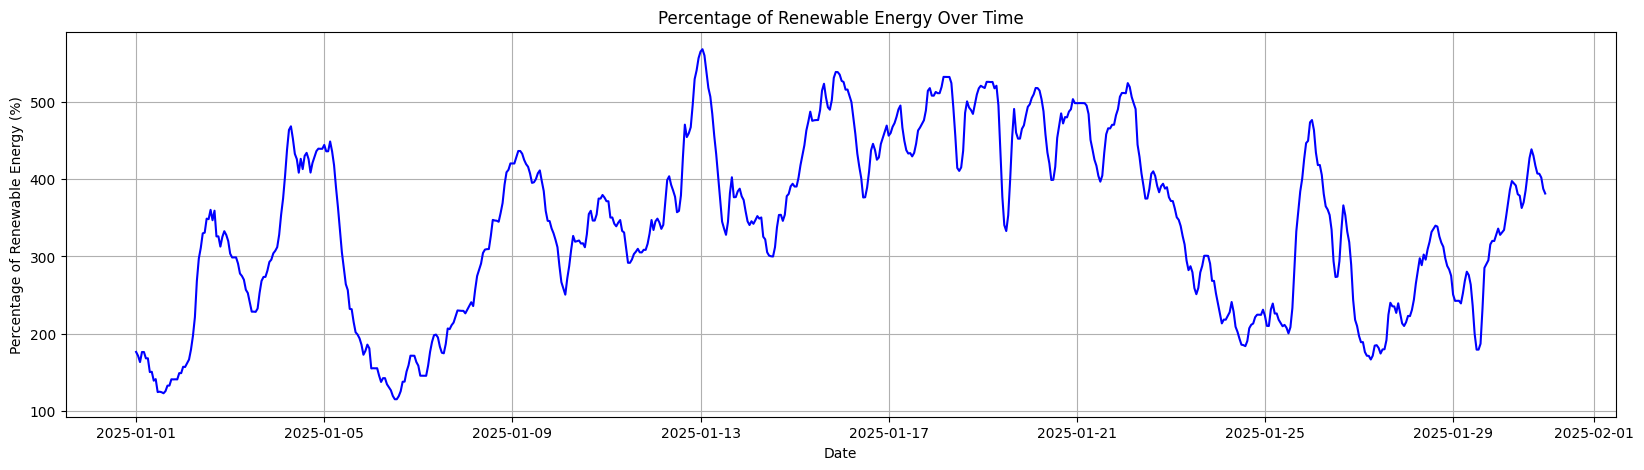

In [37]:
# Line chart for carbon intensity 
plt.figure(figsize=(20, 5))
plt.plot(ci1["startTime"], ci1["ci_default"], linestyle="-", color="blue")
plt.xlabel("Date")
plt.ylabel("Percentage of Renewable Energy (%)")
plt.title("Percentage of Renewable Energy Over Time")
plt.grid(True)
plt.show()

We can also compare the Carbon emissions values with the percentage of green energy 

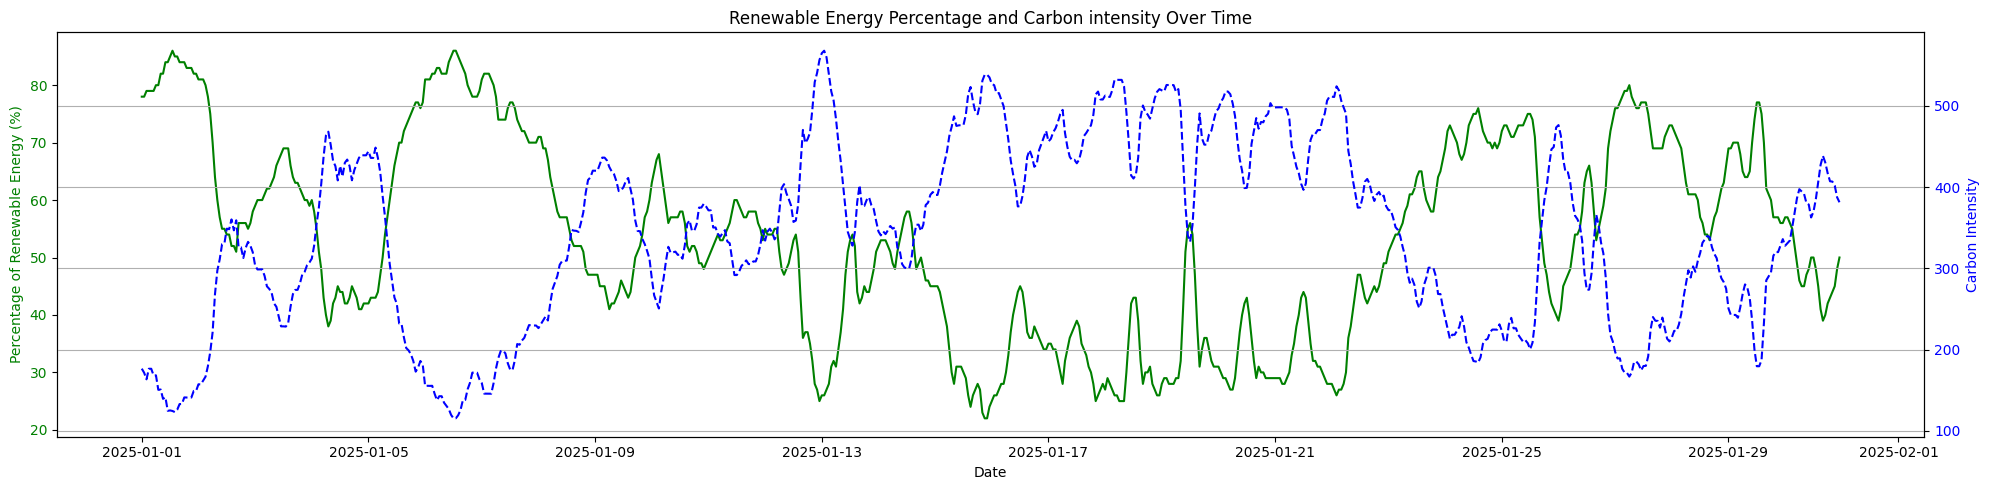

In [47]:
# Create a figure and a twin y-axis
fig, ax1 = plt.subplots(figsize=(20, 5))

# Plot percentage values on the first y-axis
ax1.set_xlabel("Date")
ax1.set_ylabel("Percentage of Renewable Energy (%)", color="green")
ax1.plot(de1["data"]["startTime"], de1["data"]["percentRenewable"],  color="green", label="Renewable Percentage")
ax1.tick_params(axis='y', labelcolor="green")

# Create a second y-axis for numerical values
ax2 = ax1.twinx()
ax2.set_ylabel("Carbon Intensity", color="blue")
ax2.plot(ci1["startTime"], ci1["ci_default"],  linestyle="--", color="blue", label="Carbon Intensity")
ax2.tick_params(axis='y', labelcolor="blue")

# Title and grid
plt.title("Renewable Energy Percentage and Carbon intensity Over Time")
fig.tight_layout()
plt.grid(True)
plt.show()




We can see that a higher percentage of renewable energy results in lower carbon intensity value.

## Finding an optimal time to perform a computation

## Calculating carbon emissions of a compuational task